<a href="https://colab.research.google.com/github/MuskaansGithup/CodSoft_1/blob/main/Credit_card_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING OF DATASET

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Number of Records : ",df.shape[0],"\nNumber of Features : ",df.shape[1])

Number of Records :  284807 
Number of Features :  31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

FEATURE ENGINEERING

1. MISSING VALUES

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

2. DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


3. EDA

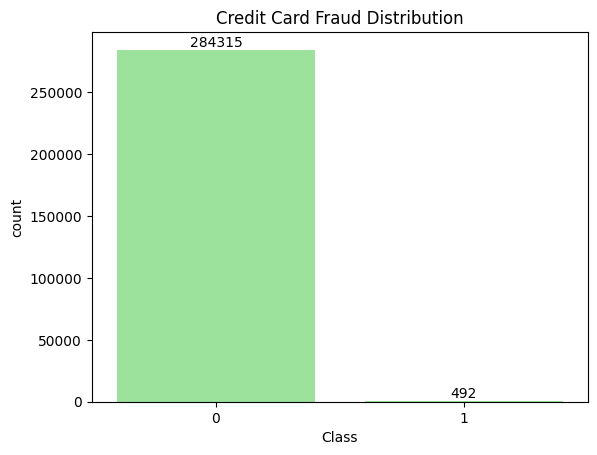

In [ ]:
#PLOT THE DISTRIBUTION OF TARGET VALUE
class_counts = df['Class'].value_counts()
sns.countplot(x='Class', data=df, color= "lightgreen")
plt.title('Credit Card Fraud Distribution')
for index, value in enumerate(class_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

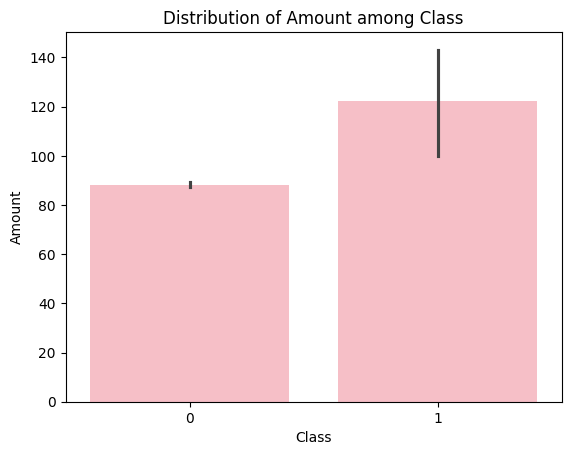

In [ ]:
# Distribution of Amount among Class
sns.barplot(x='Class',y='Amount',data=df, color = "lightpink")
plt.title('Distribution of Amount among Class')
plt.show()

<ipython-input-9-d7936240079c>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], shade=True, label='Fraud')
<ipython-input-9-d7936240079c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud[col], shade=False, label='Non-Fraud')
<ipython-input-9-d7936240079c>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], shade=True, label='Fraud')
<ipython-input-9-d7936240079c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud[col], shade=False, label='Non-Fraud')
<ipython

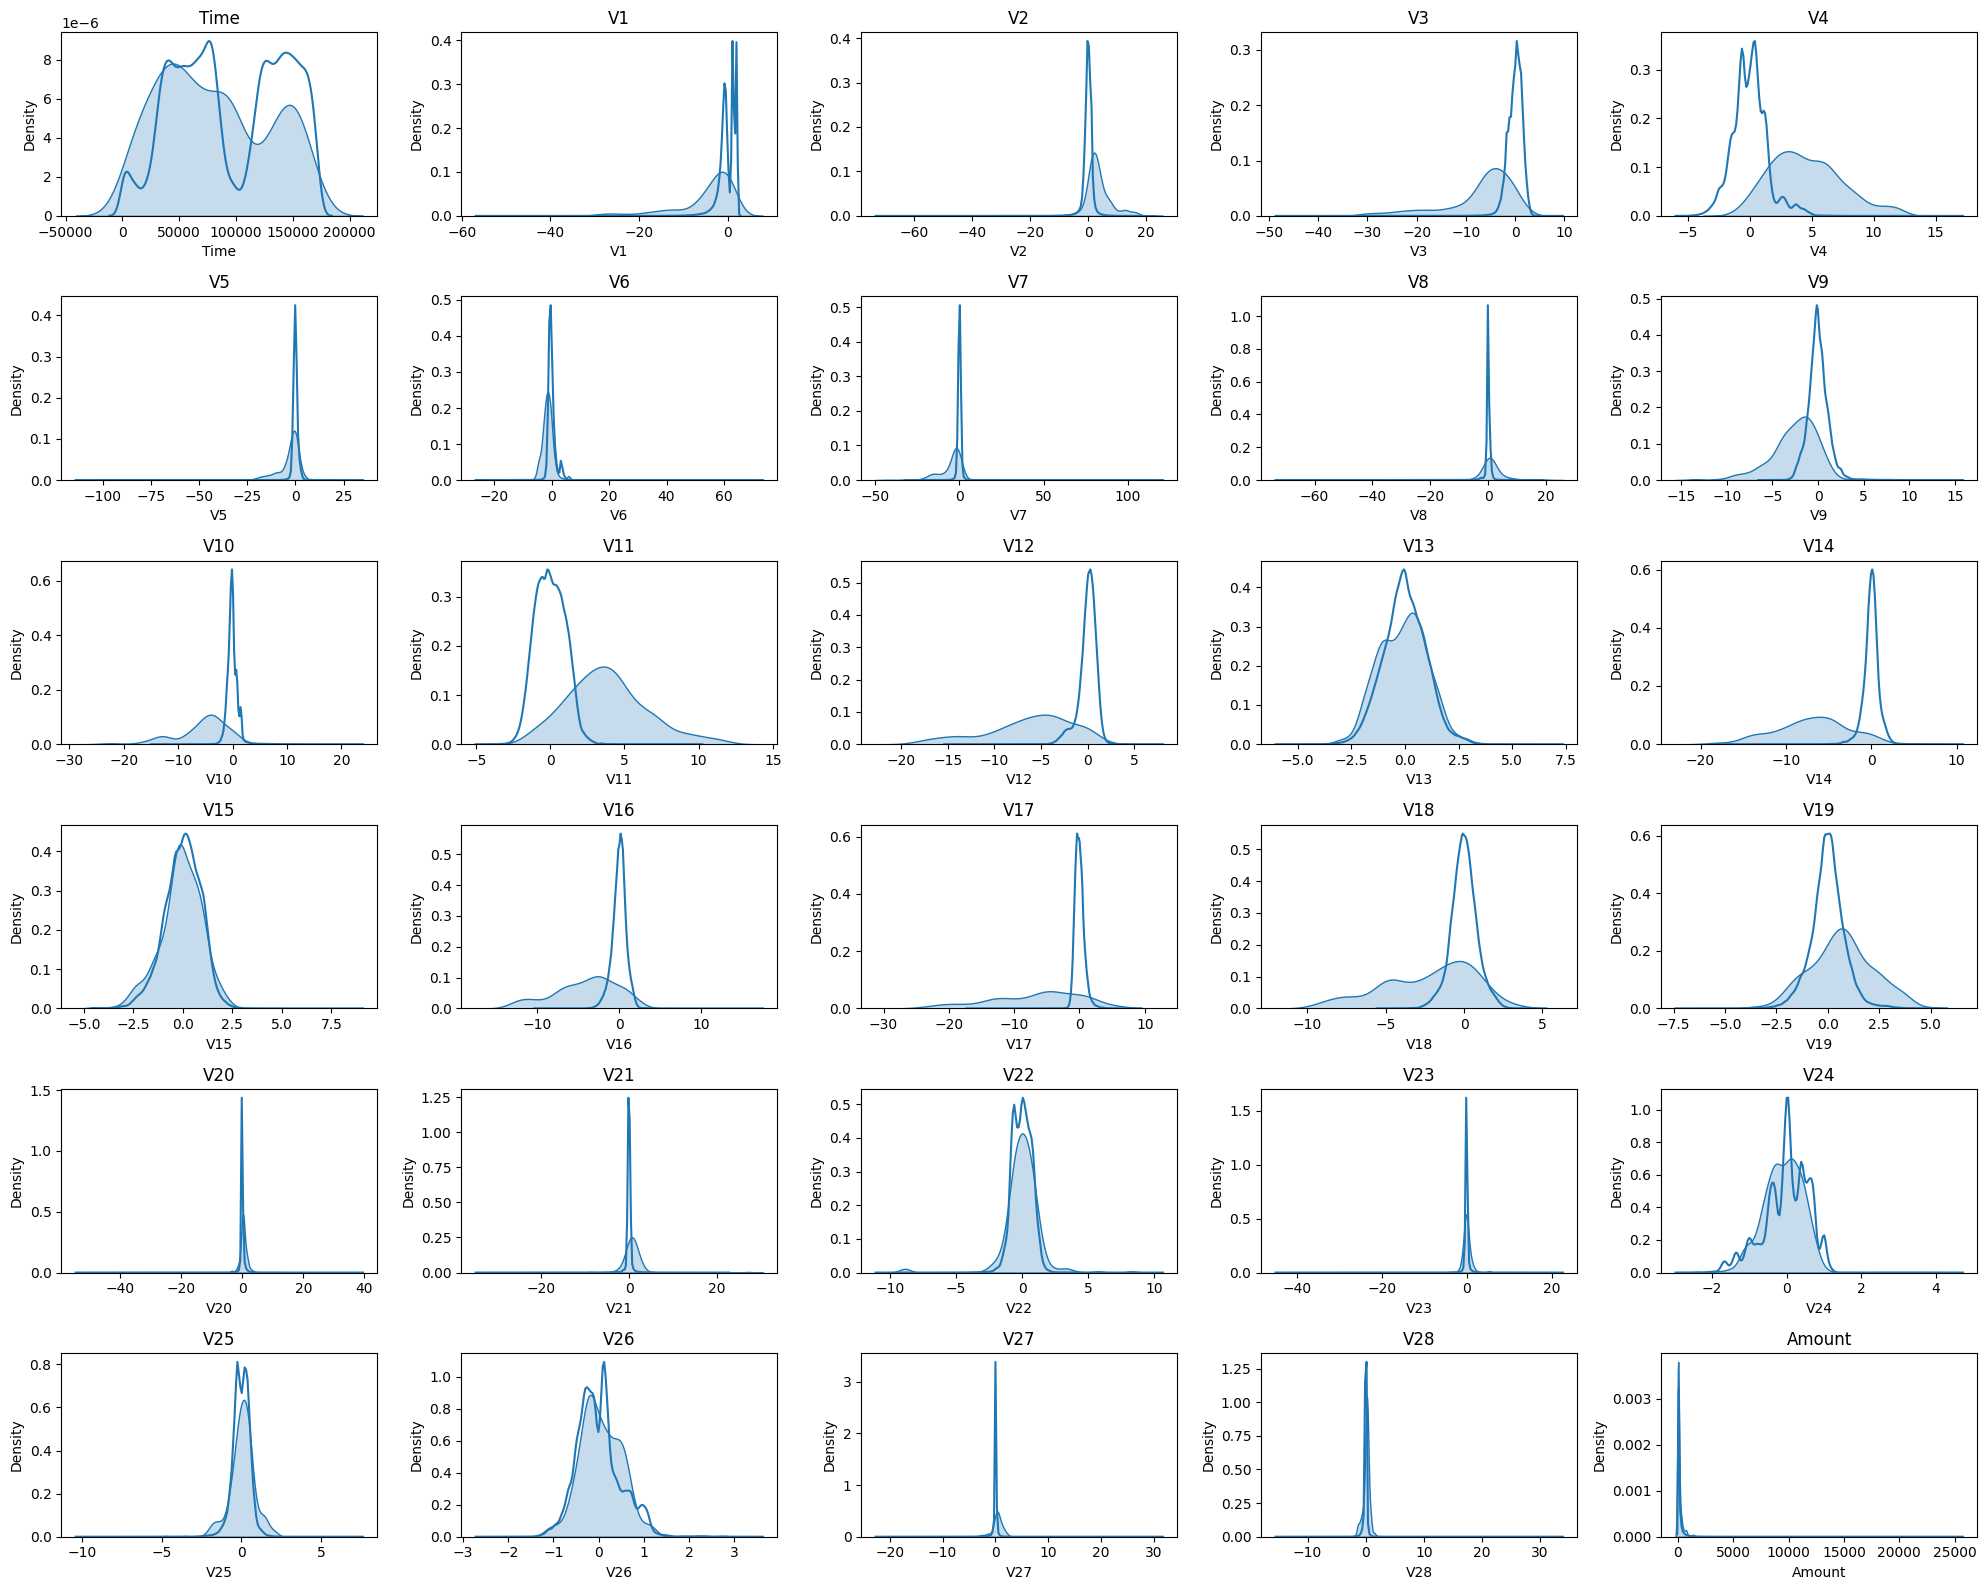

In [ ]:
# Distribution of Features for both Classes
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
plt.figure(figsize=(20, 16))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(6, 5, i)
    sns.kdeplot(fraud[col], shade=True, label='Fraud')
    sns.kdeplot(non_fraud[col], shade=False, label='Non-Fraud')
    plt.title(col)
plt.tight_layout()
plt.show()

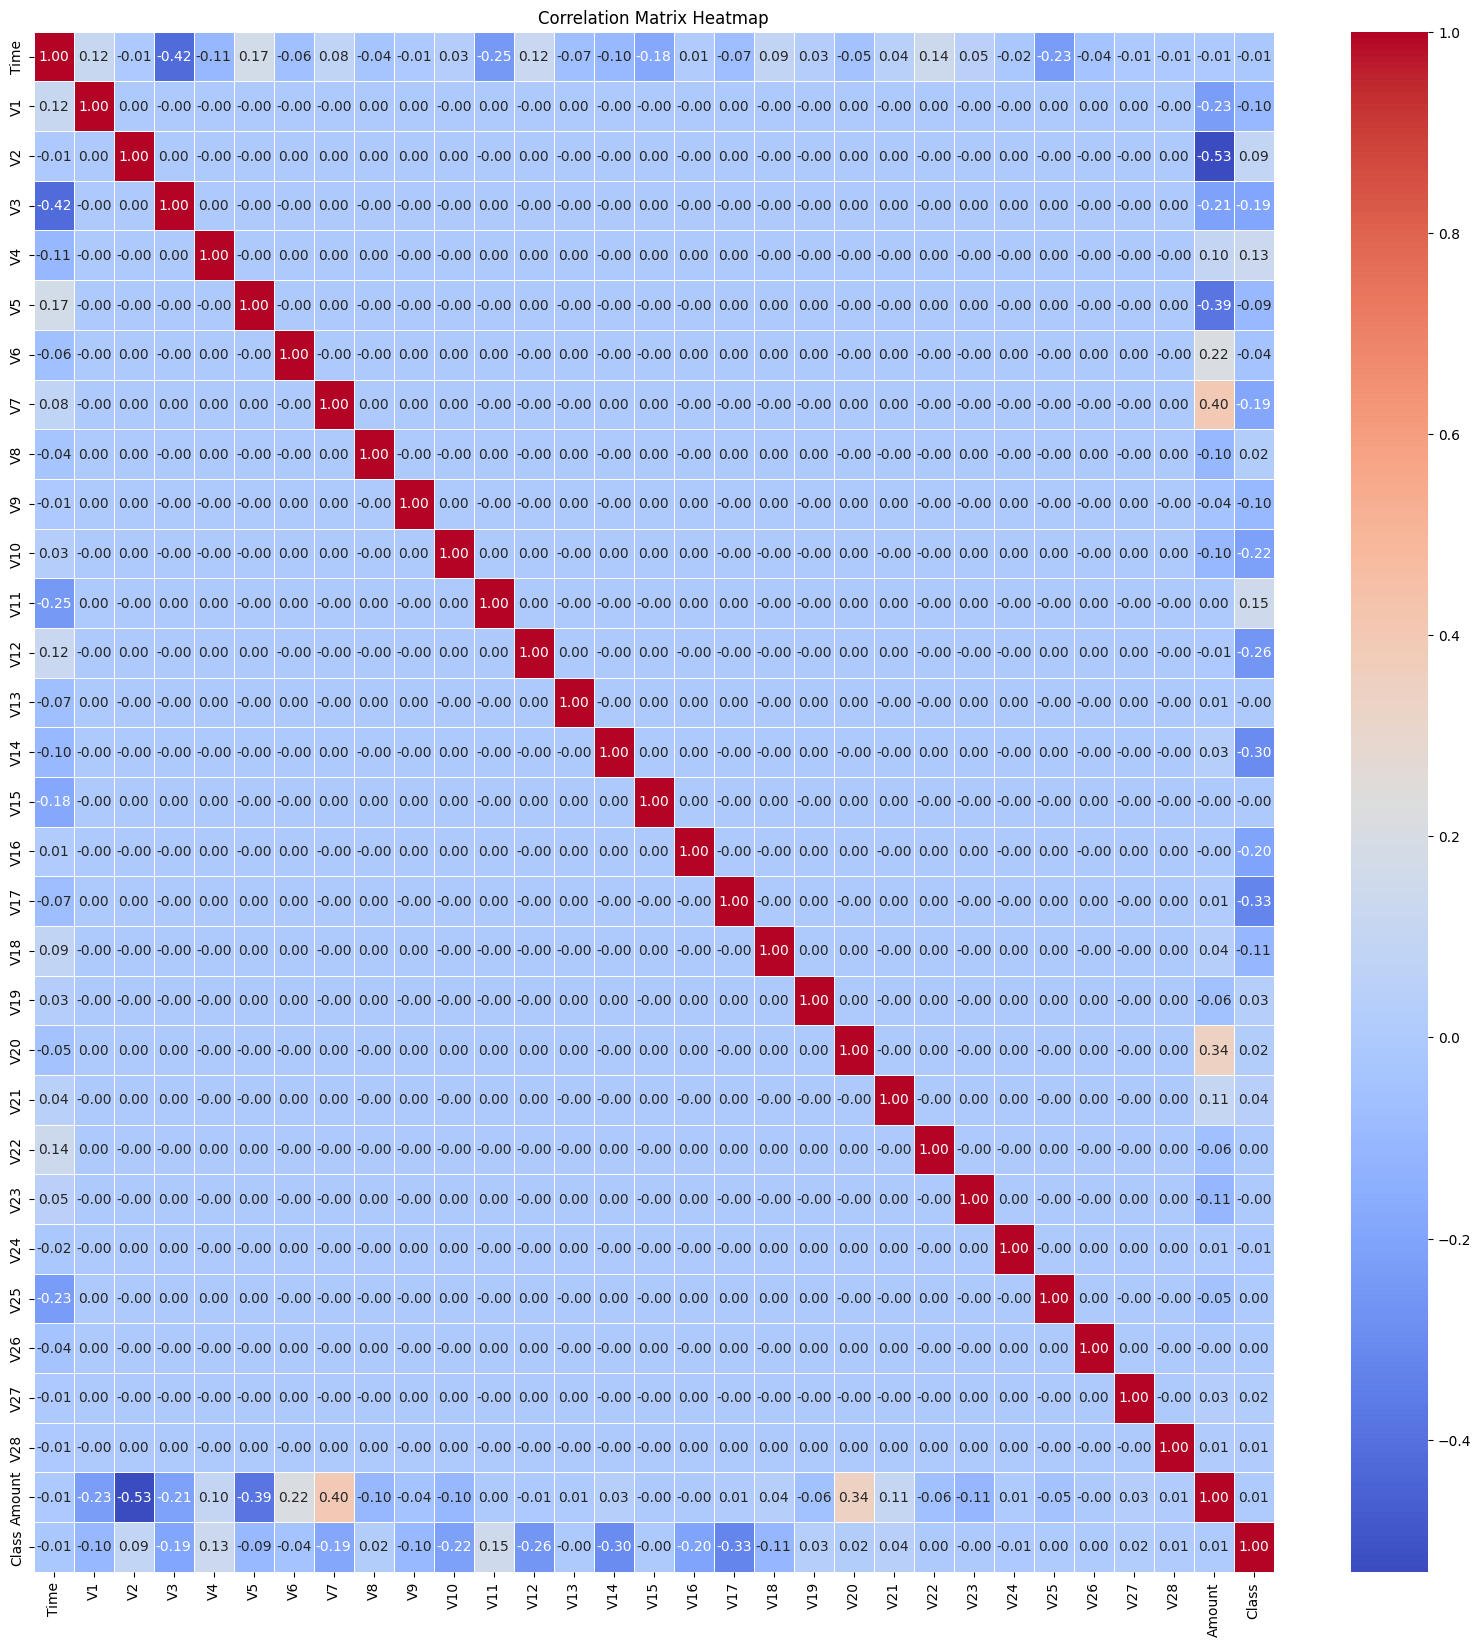

In [ ]:
# Correlation Matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# SPLITING THE DATASET
X= df.drop(['Class'],axis=1)
y = df['Class']

4. HANDLING IMBALANCED DATA



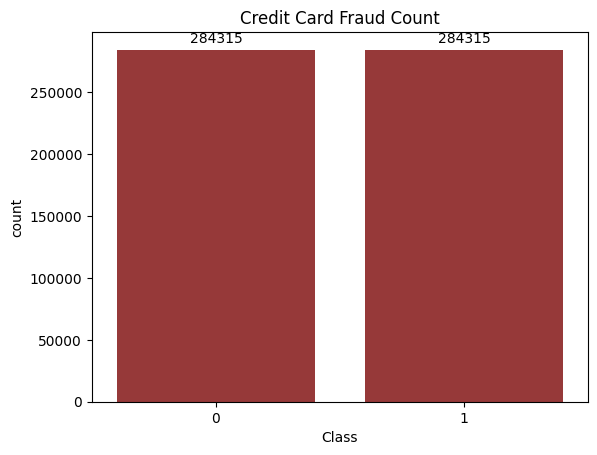

In [ ]:
# Create an instance of the SMOTE class
smote_instance = SMOTE(sampling_strategy='minority')

# Use the fit_resample method to perform oversampling
X_sm, y_sm = smote_instance.fit_resample(X, y)

# Check the class distribution after oversampling
plot =sns.countplot(x=y_sm, color = 'brown')
plt.title('Credit Card Fraud Count')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points')

plt.show()

5. NORMALISE X VARIABLES

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_sm)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.905935,-0.138898,-0.364974,0.743396,-0.023756,0.047102,0.733676,0.287427,-0.065536,0.487687,...,0.340077,-0.222950,0.251229,-0.202907,0.103388,0.123149,-0.315806,0.150832,-0.212716,1.289274
1,-0.905935,0.518112,-0.251484,0.312079,-0.235386,0.224103,0.387714,0.194900,-0.078455,0.229523,...,-0.173637,-0.479742,-0.642027,0.311532,-0.457505,0.180699,0.231448,-0.133957,-0.080563,-0.230811
2,-0.905924,-0.138524,-0.789353,0.604505,-0.250946,-0.026161,1.583491,0.447797,0.076020,-0.295481,...,0.778572,0.106667,0.732541,2.274726,-0.939332,-0.556433,-0.228911,-0.226601,-0.355661,3.658839
3,-0.905924,-0.037569,-0.402626,0.608105,-0.533818,0.192854,1.232101,0.286849,0.199315,-0.242269,...,-0.396365,-0.334338,-0.014420,-0.396880,-1.609873,0.896071,-0.372812,0.009307,0.092060,1.019045
4,-0.905912,-0.086996,-0.046696,0.563647,-0.245654,0.016498,0.500939,0.390108,-0.416370,0.676951,...,0.591937,-0.211963,0.758465,-0.268460,0.205892,-0.375235,0.885349,0.322383,0.659777,0.465450


MODEL SELECTION

1. LOGISTIC REGRESSION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.4, random_state=42, stratify=y_sm)
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the test data
y_test_pred = logreg.predict(X_test)

MODEL EVALUATION

Model Performance for Testing Sets: 

ACCURACY SCORE:  0.972178745405624
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97    113726
           1       0.98      0.96      0.97    113726

    accuracy                           0.97    227452
   macro avg       0.97      0.97      0.97    227452
weighted avg       0.97      0.97      0.97    227452

CONFUSION MATRIX: 
 [[111403   2323]
 [  4005 109721]]


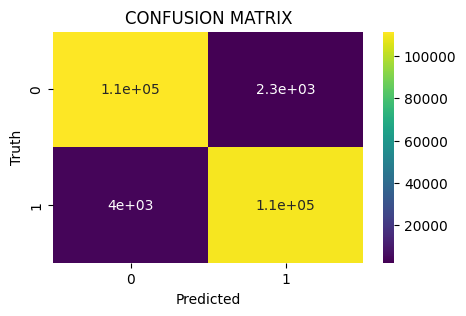

In [ ]:
# Calculate the metrices for test dataset
print("Model Performance for Testing Sets: \n")
print("ACCURACY SCORE: ", metrics.accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT: \n",metrics.classification_report(y_test, y_test_pred))
log1= metrics.confusion_matrix(y_test, y_test_pred)
print("CONFUSION MATRIX: \n",log1)

# PLOT
plt.figure(figsize=(5,3))
sns.heatmap(log1, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("CONFUSION MATRIX")
plt.show()

AUC-ROC CURVE

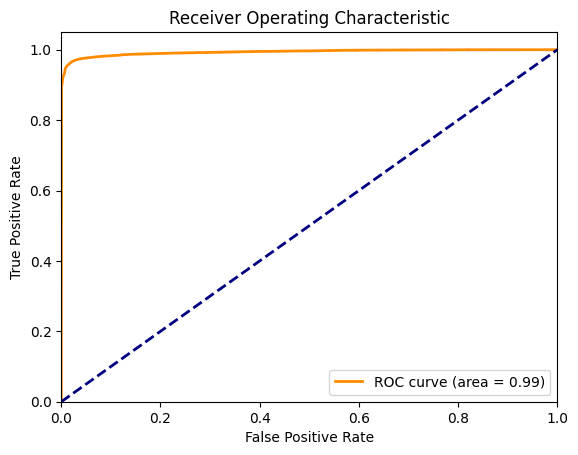

In [ ]:
# Get predicted probabilities for the positive class
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

2. RANDOM FOREST CLASSIFIER

In [ ]:
rand_forest= RandomForestClassifier(n_estimators=50,random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Predict on the training and test data
y_test_pred = rand_forest.predict(X_test)

MODEL EVALUATION

Model Performance for Testing Sets: 

ACCURACY SCORE:  0.9998637075075181
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113726
           1       1.00      1.00      1.00    113726

    accuracy                           1.00    227452
   macro avg       1.00      1.00      1.00    227452
weighted avg       1.00      1.00      1.00    227452

CONFUSION MATRIX: 
 [[113697     29]
 [     2 113724]]


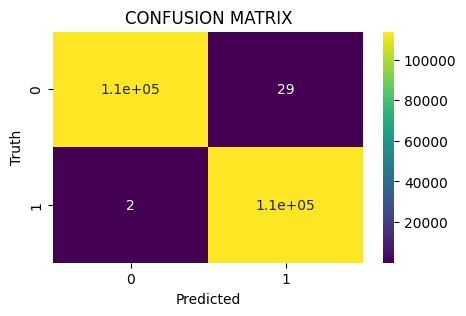

In [ ]:
# Calculate the metrices for test dataset
print("Model Performance for Testing Sets: \n")
print("ACCURACY SCORE: ", metrics.accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT: \n",metrics.classification_report(y_test, y_test_pred))
rand_forest1= metrics.confusion_matrix(y_test, y_test_pred)
print("CONFUSION MATRIX: \n",rand_forest1)

# PLOT
plt.figure(figsize=(5,3))
sns.heatmap(rand_forest1, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("CONFUSION MATRIX")
plt.show()

AUC-ROC CURVE

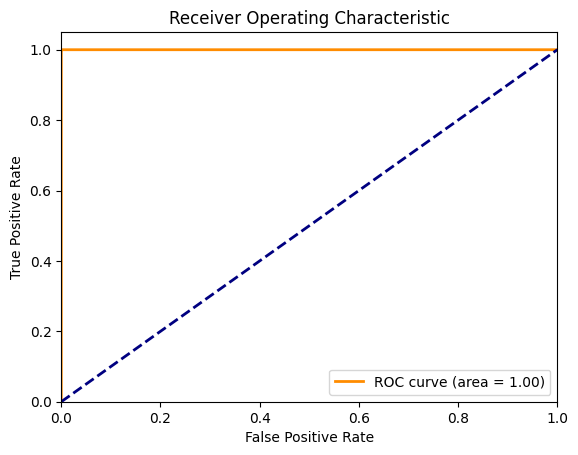

In [ ]:
# Get predicted probabilities for the positive class
y_pred_proba = rand_forest.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()